<a href="https://colab.research.google.com/github/gabmck/cs4410/blob/main/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gabrielle McKeever \
CS 4410 XTIA \
Homework 2 \
Exercise 15.15

# Instructions

**(Linear Regression with the Diabetes Dataset)**
Investigate the Diabetes dataset bundled with scikit-learn

https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset
The dataset contains 442 samples, each with 10 features and a label indicating the “disease progression one year after baseline.” Using this dataset, reimplement the steps of this chapter’s multiple linear regression case study in Section 15.5.

## Loading the data

In [4]:
%matplotlib inline
from sklearn.datasets import load_diabetes

In [2]:
diabetes = load_diabetes()

In [6]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

## Displaying the Dataset's Description

In [7]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [8]:
diabetes.data.shape

(442, 10)

In [9]:
diabetes.target.shape

(442,)

In [10]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

## Exploring the Data with a Pandas

In [11]:
import pandas as pd

In [15]:
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [17]:
diabetes_df['disease_progression'] = pd.Series(diabetes.target)

In [18]:
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [19]:
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


## Visualizing the Features

In [20]:
sample_df = diabetes_df.sample(frac=0.1, random_state=17)

In [21]:
import matplotlib.pyplot as plt

In [22]:
import seaborn as sns

In [39]:
 #sns.set(font_scale=2)

In [23]:
sns.set_style('whitegrid')

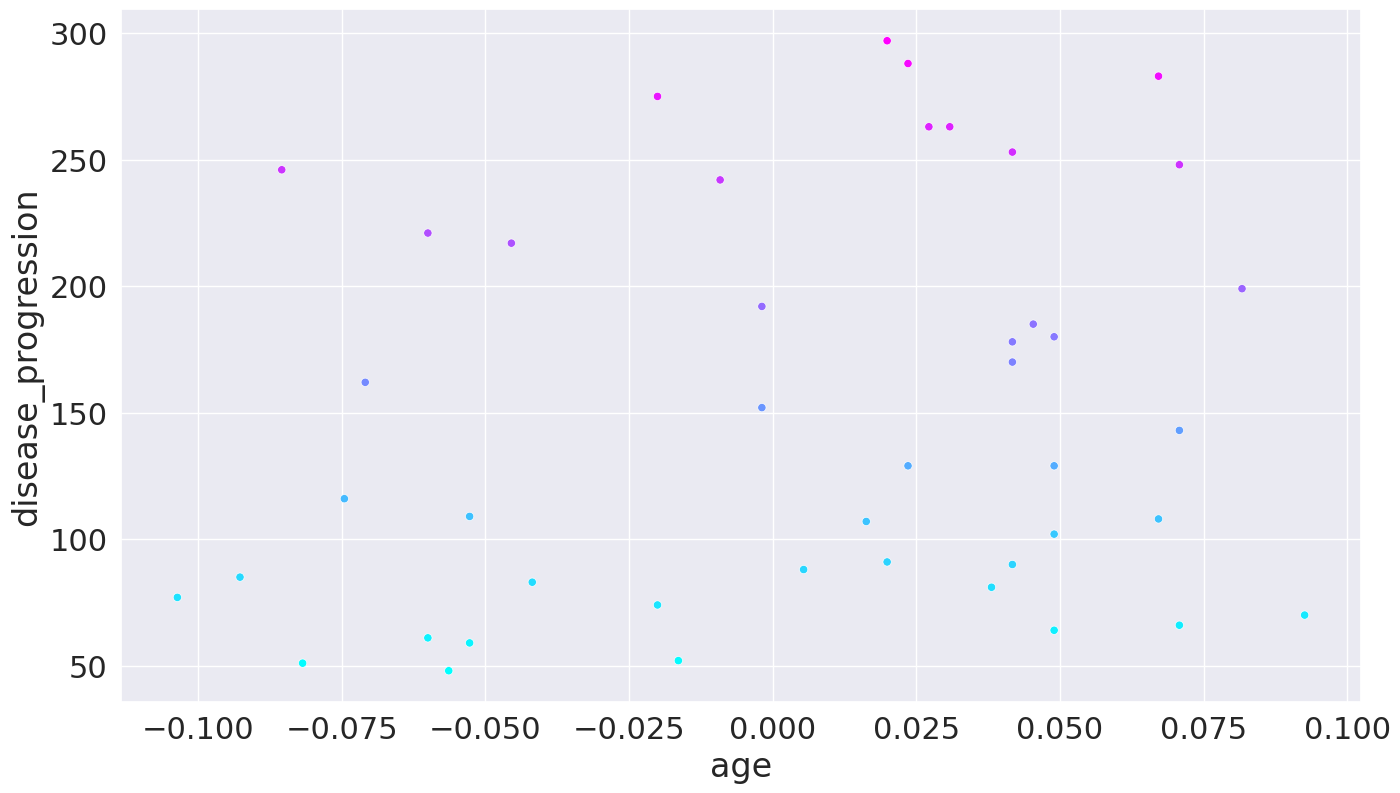

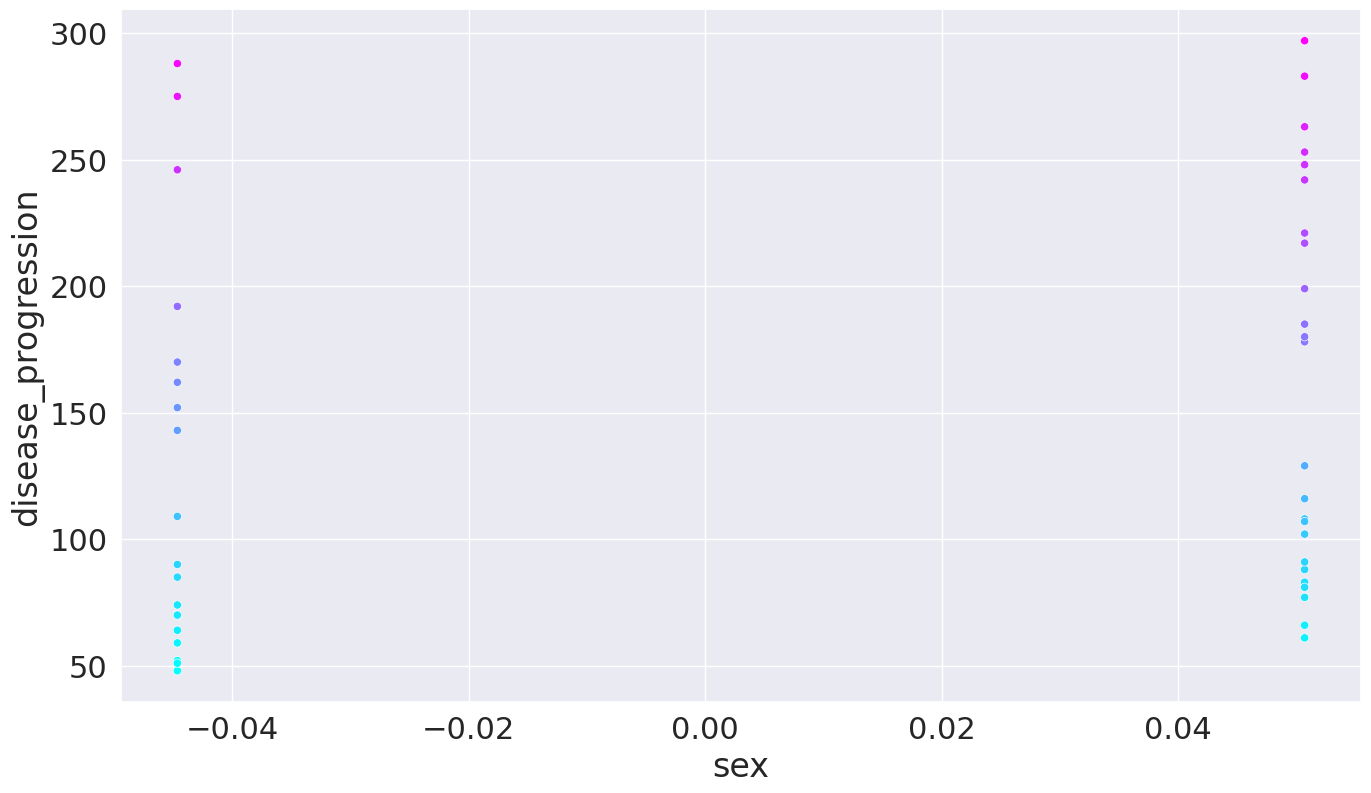

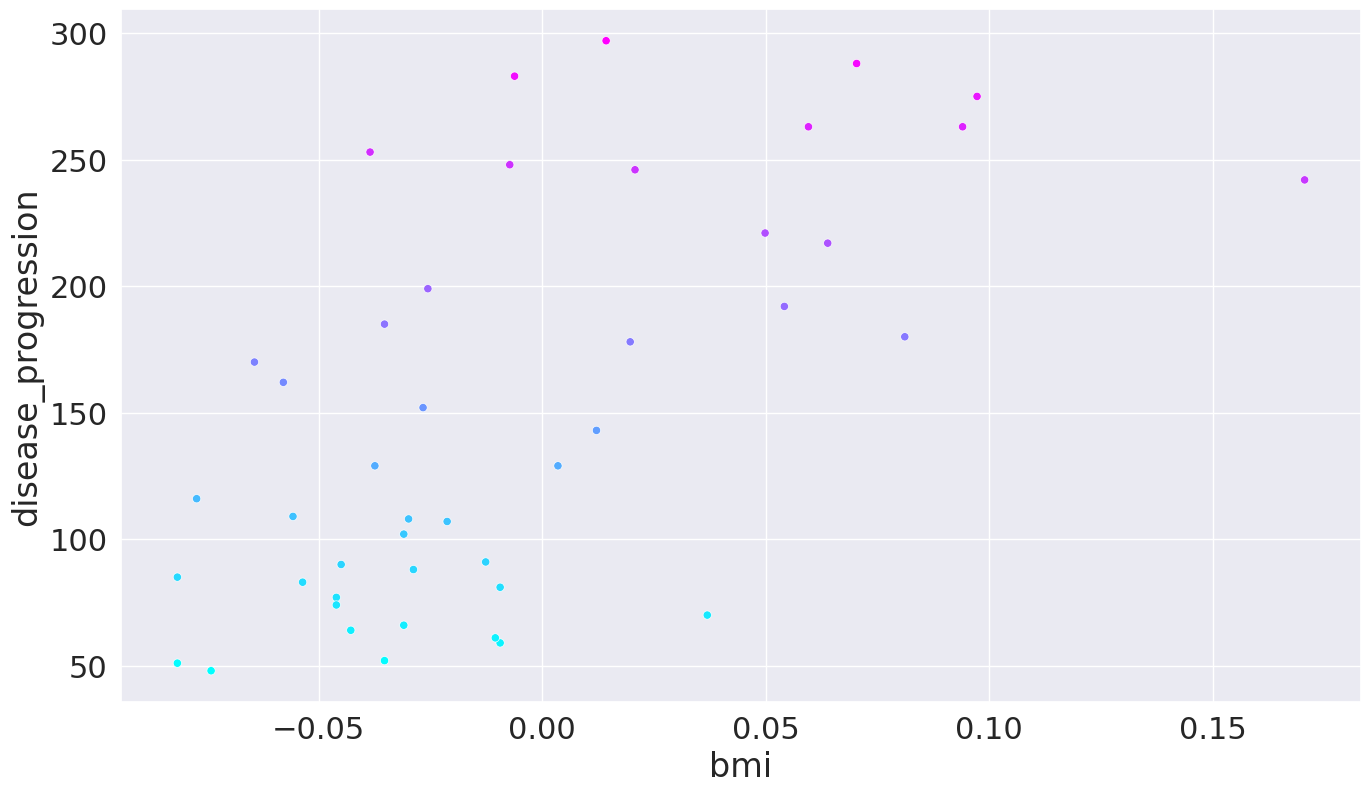

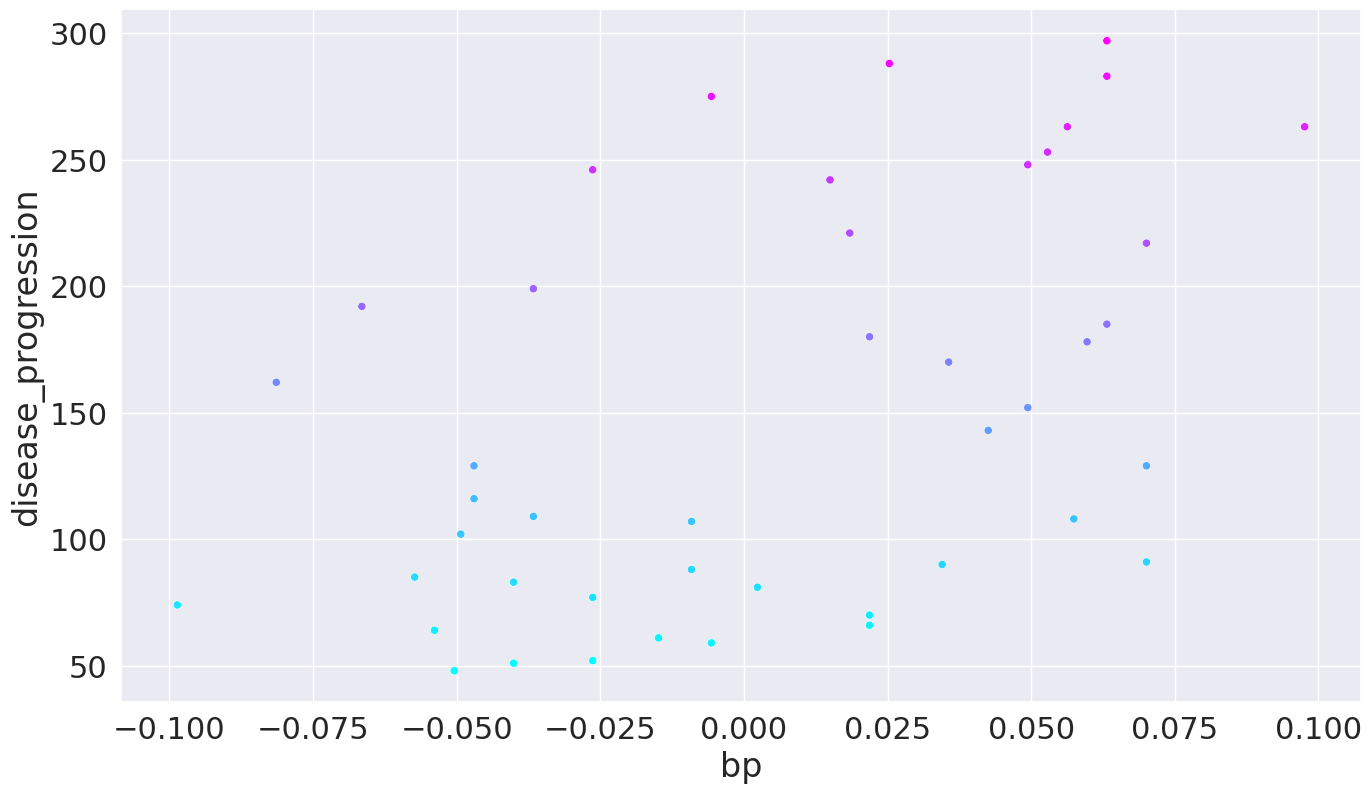

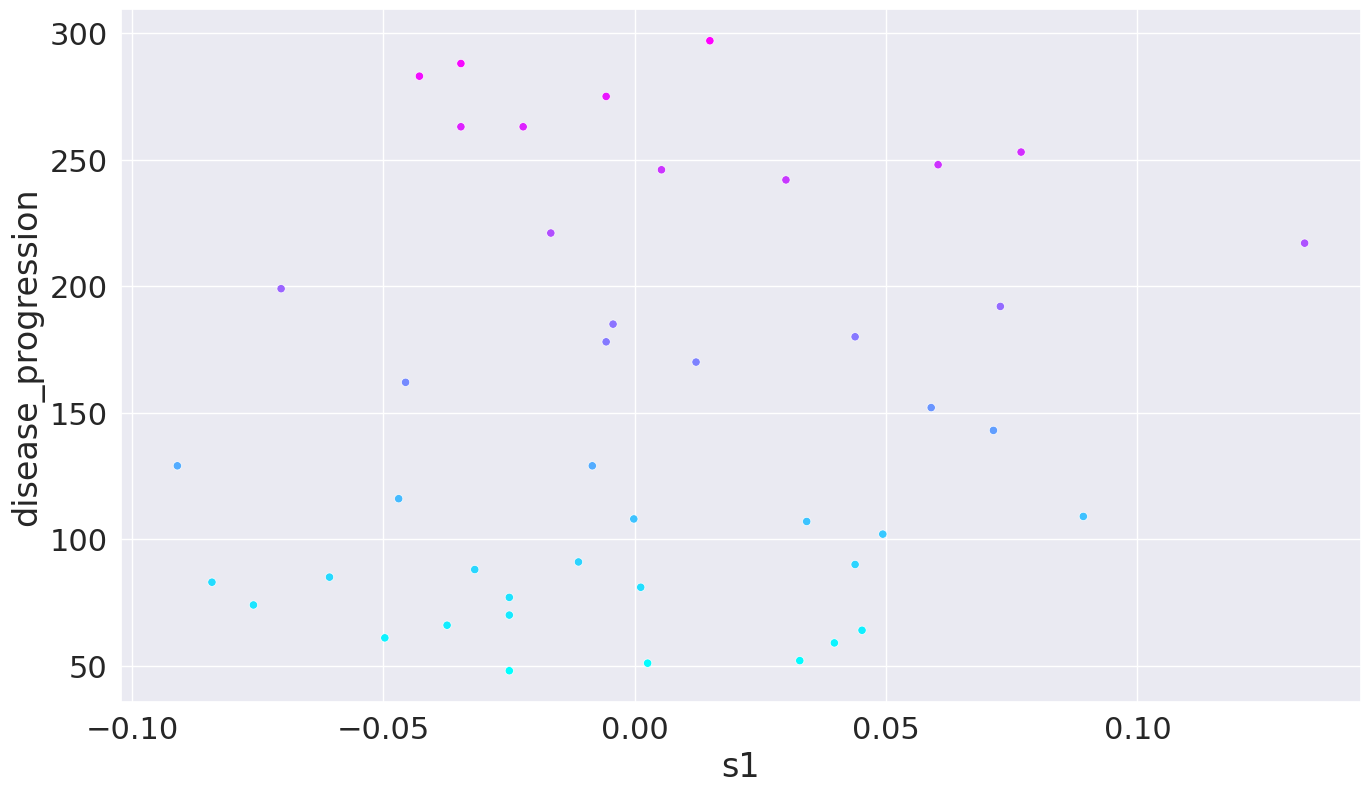

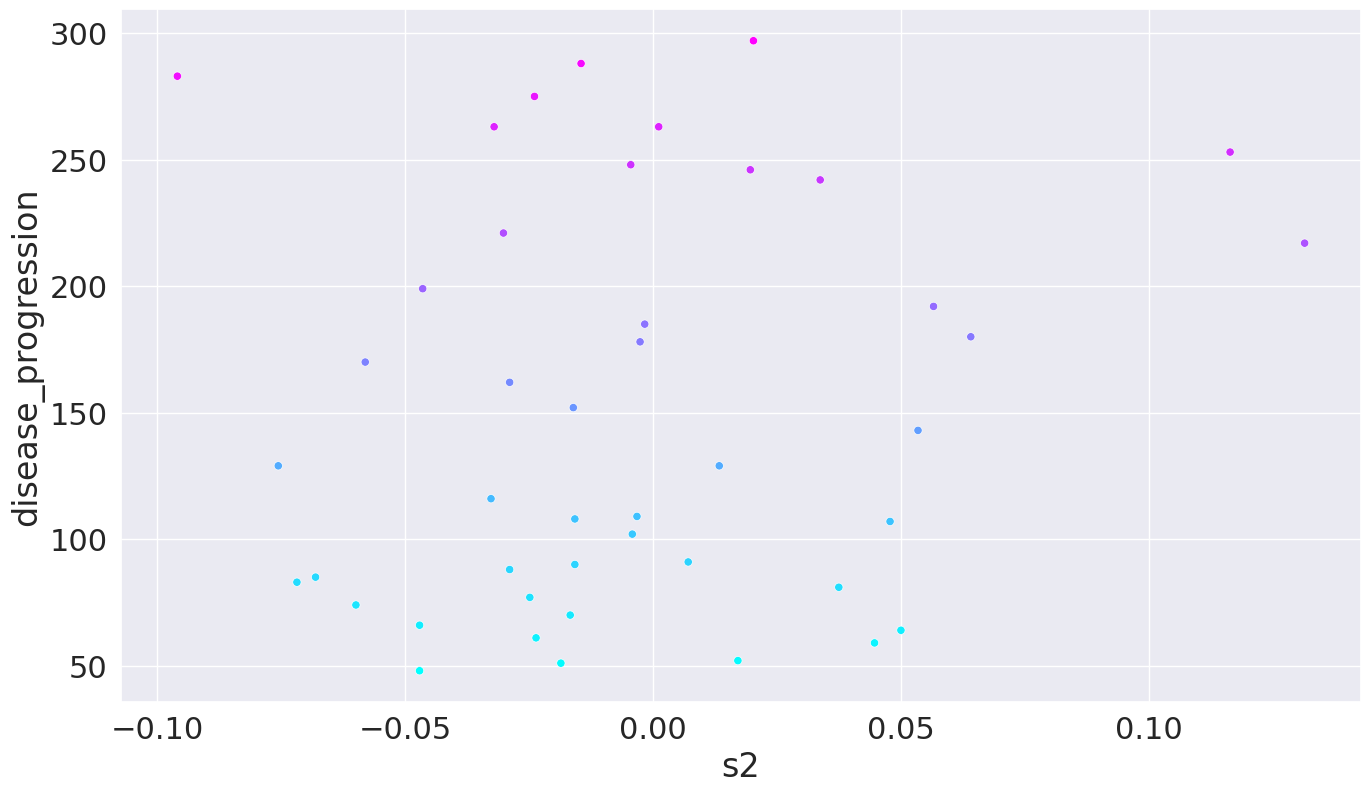

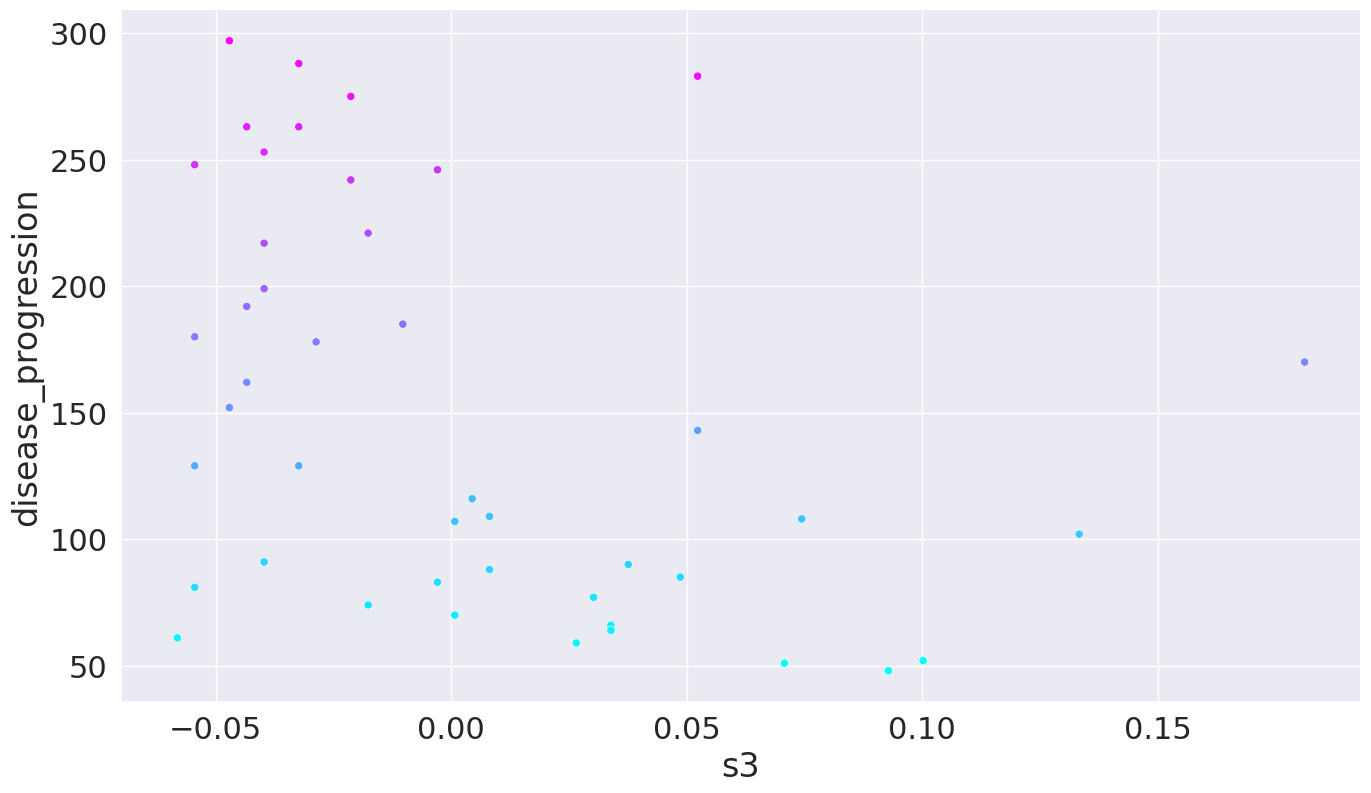

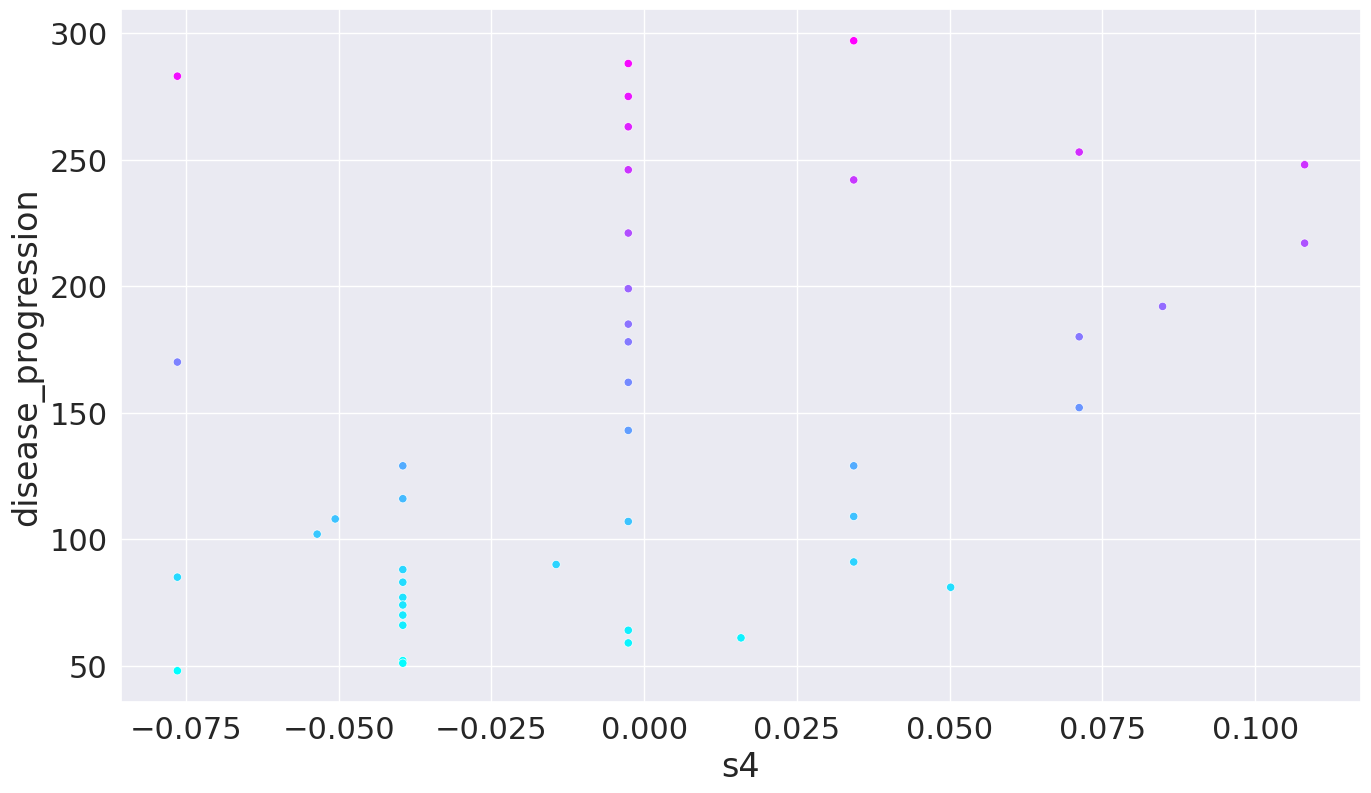

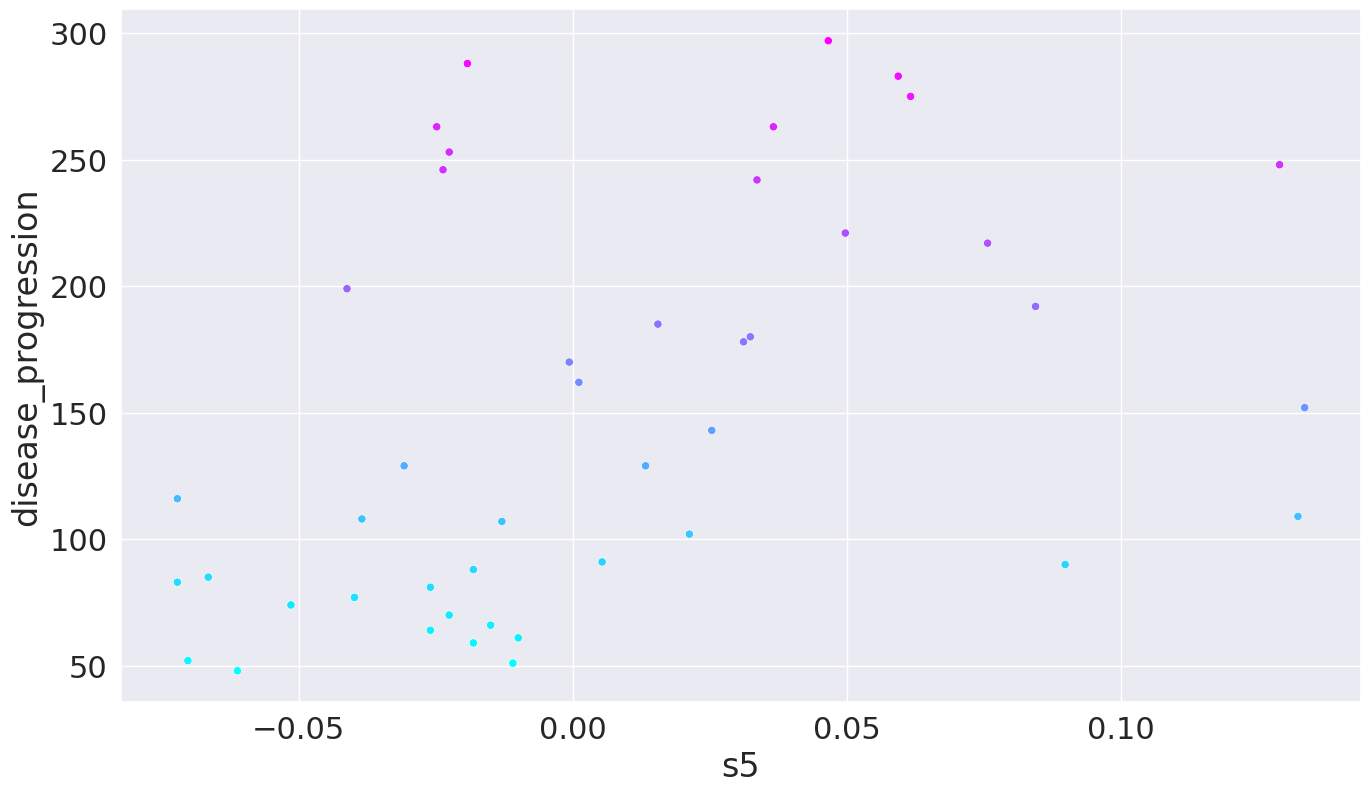

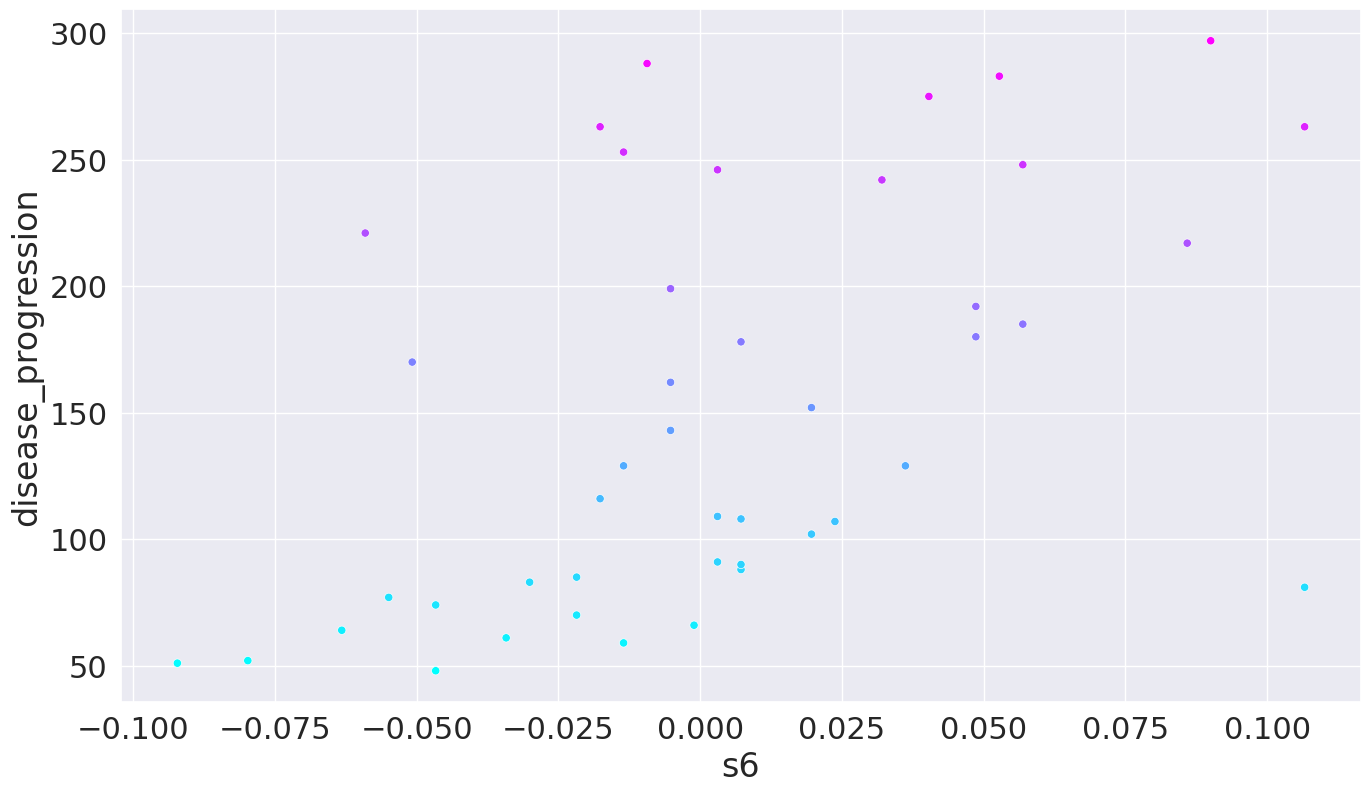

In [40]:
for feature in diabetes.feature_names:
    plt.figure(figsize=(16, 9))
    sns.scatterplot(data=sample_df, x=feature, y='disease_progression', hue='disease_progression', palette='cool', legend=False)

## Splitting the Data for Training and Testing using train_test_split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=11)

In [43]:
X_train.shape

(331, 10)

In [44]:
X_test.shape

(111, 10)

## Training the Model

In [45]:
from sklearn.linear_model import LinearRegression

In [48]:
linear_regression = LinearRegression()

In [49]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [50]:
for i, name in enumerate(diabetes.feature_names):
    print(f'{name:>10}: {linear_regression.coef_[i]}')

       age: -60.21981405677291
       sex: -266.45705232203574
       bmi: 523.0634112596993
        bp: 310.5134699670048
        s1: -336.1614738106944
        s2: 137.3392923842451
        s3: -131.13923283453653
        s4: -1.1492348017315557
        s5: 622.3286855688128
        s6: 60.466457691682535


In [60]:
linear_regression.intercept_

152.22822762230342

## Testing the Model

In [52]:
predicted = linear_regression.predict(X_test)

In [53]:
expected = y_test

In [54]:
predicted[:5] #first 5 predictions

array([115.46474836,  83.4585369 , 160.77727376, 187.65710274,
        72.72122197])

In [56]:
expected[:5] #first 5 targets

array([ 79.,  55., 109., 178.,  39.])

## Visualizing the Expected vs. Predicted

In [57]:
df=pd.DataFrame()

In [58]:
df['Expected'] = pd.Series(expected)

In [59]:
df['Predicted'] = pd.Series(predicted)

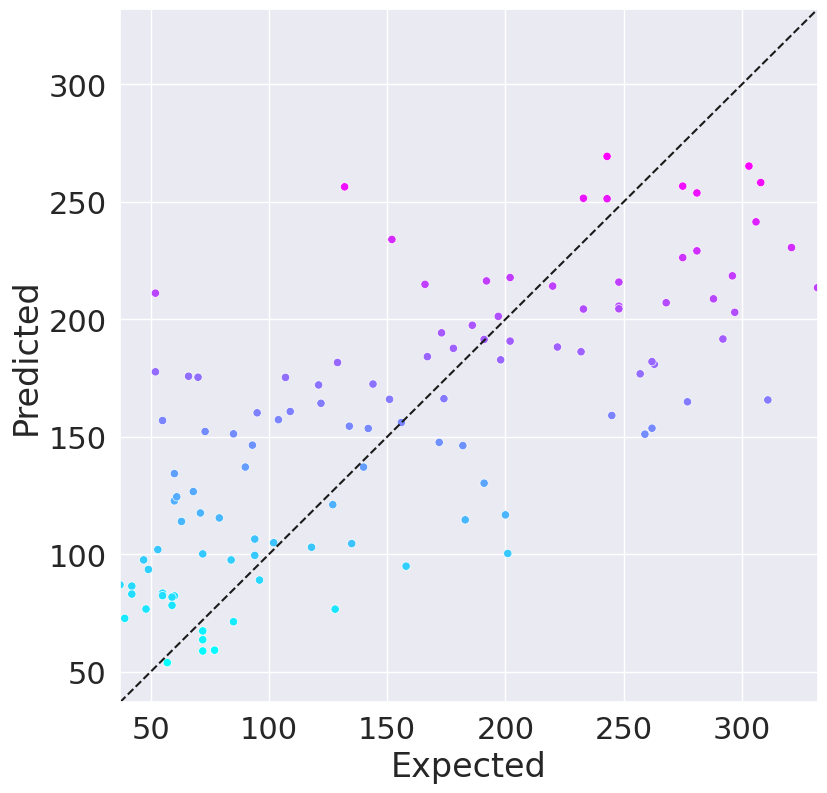

In [61]:
figure = plt.figure(figsize=(9, 9))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted',
    hue='Predicted', palette='cool', legend=False)

start = min(expected.min(), predicted.min())

end = max(expected.max(), predicted.max())

axes.set_xlim(start, end)

axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')

## Regression Model Metrics

In [62]:
from sklearn import metrics

In [63]:
metrics.r2_score(expected, predicted)

0.5322429620529407

## Choosing the Best Model

In [66]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

In [67]:
estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

In [73]:
from sklearn.model_selection import KFold, cross_val_score

In [74]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, X=diabetes.data, y=diabetes.target, cv=kfold, scoring='r2')
    print(f'{estimator_name:>16}: ' + f'mean of r2 scores={scores.mean():.3f}')


LinearRegression: mean of r2 scores=0.475
      ElasticNet: mean of r2 scores=-0.002
           Lasso: mean of r2 scores=0.339
           Ridge: mean of r2 scores=0.421
